In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:32841 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 68.72 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_cont_param_kpp2.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont_kpp','025deg_jra55_ryf_nostress_cont_param_kpp','025deg_jra55_ryf_nostress_cont_param_kpp2']
name = ['Control', 'KPP_a80', 'KPP_a60']

In [4]:
hblt_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')
hblt_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')
hblt_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'hblt', frequency = '1 daily', ncfile = 'ocean-2d-hblt-1-daily-snap-ym_190%_01.nc')

area_t = cc.querying.getvar(expt=expt[1], variable='area_t', session=session, frequency='static', n=1)

area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_t_NA = (xr.ufuncs.isfinite(hblt_cont)*area_t_NA).mean('time')

area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_t_NP = (xr.ufuncs.isfinite(hblt_cont)*area_t_NP).mean('time')

area_t_SA = area_t.sel(xt_ocean = slice(-70,20)).sel(yt_ocean = slice(-65,-10))
area_t_SA = (xr.ufuncs.isfinite(hblt_cont)*area_t_SA).mean('time')

area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))
area_t_SP = (xr.ufuncs.isfinite(hblt_cont)*area_t_SP).mean('time')

## KPP Mixing Layer

In [5]:
hblt_cont_NA = (hblt_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NA = (hblt_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_NA = (hblt_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_NP = (hblt_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_NP = (hblt_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_NP = (hblt_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SA = (hblt_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SA = (hblt_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_SA = (hblt_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

hblt_cont_SP = (hblt_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pram_SP = (hblt_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_pra2_SP = (hblt_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'KPP mixing layer - SP')

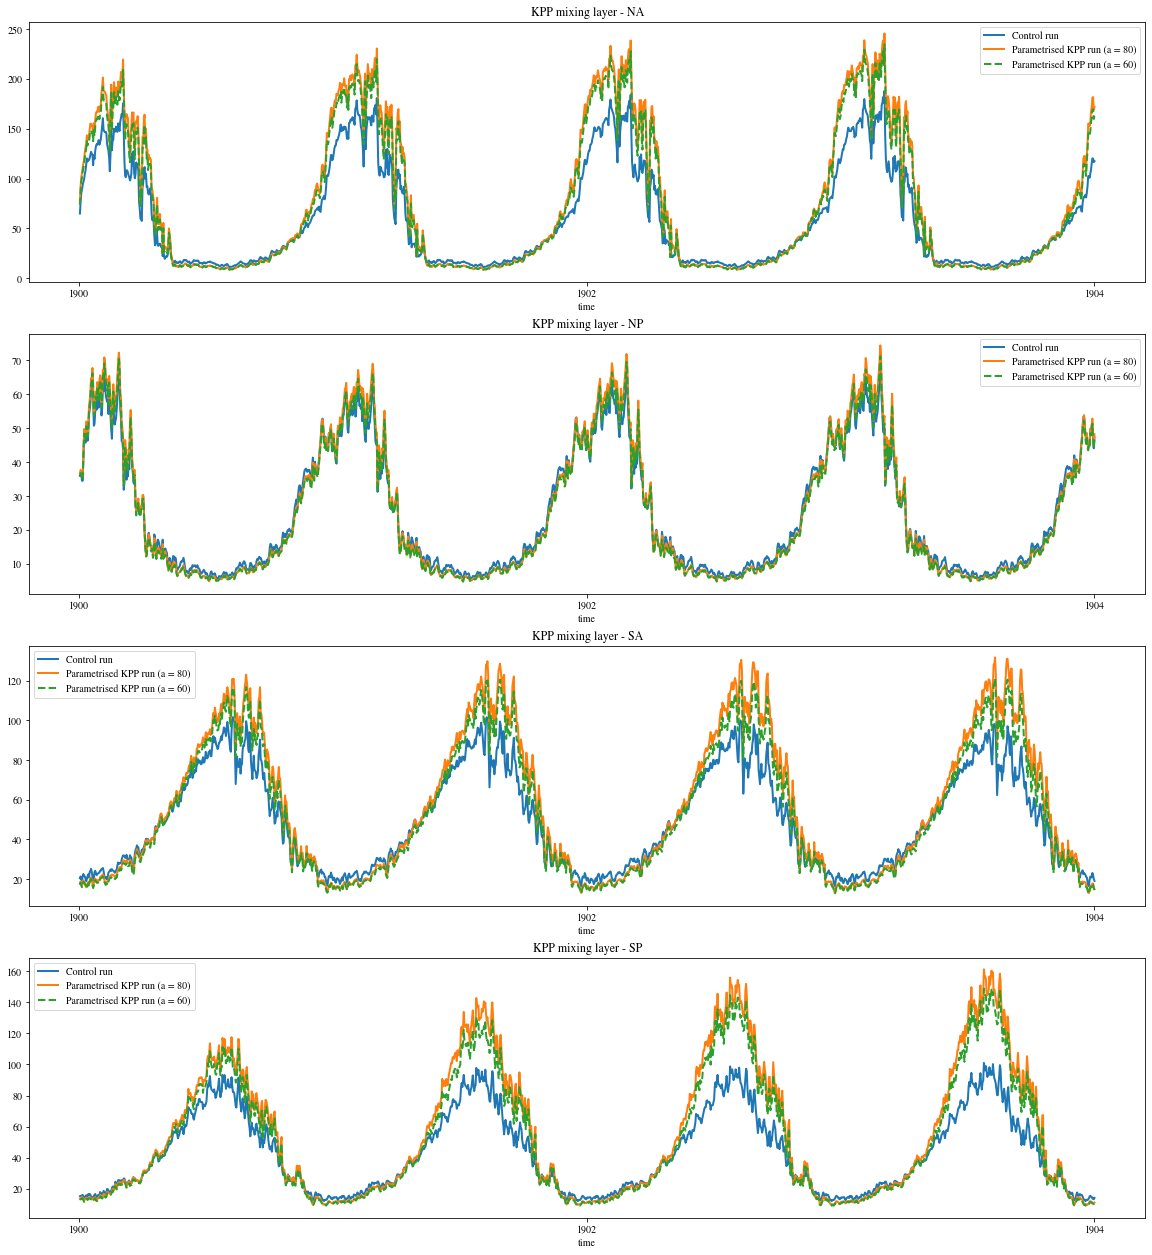

In [9]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

hblt_cont_NA.plot(ax = axes[0],label = 'Control run')
hblt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[0].legend()
axes[0].set_title('KPP mixing layer - NA')

hblt_cont_NP.plot(ax = axes[1],label = 'Control run')
hblt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[1].legend()
axes[1].set_title('KPP mixing layer - NP')

hblt_cont_SA.plot(ax = axes[2],label = 'Control run')
hblt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[2].legend()
axes[2].set_title('KPP mixing layer - SA')

hblt_cont_SP.plot(ax = axes[3],label = 'Control run')
hblt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
hblt_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[3].legend()
axes[3].set_title('KPP mixing layer - SP')

## Surface temperature

In [10]:
temp_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 daily')
temp_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_temp', frequency = '1 daily')

In [11]:
temp_cont_NA = (temp_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NA = (temp_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_NA = (temp_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_NP = (temp_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_NP = (temp_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_NP = (temp_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SA = (temp_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SA = (temp_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_SA = (temp_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

temp_cont_SP = (temp_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pram_SP = (temp_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_pra2_SP = (temp_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface temperature - SP')

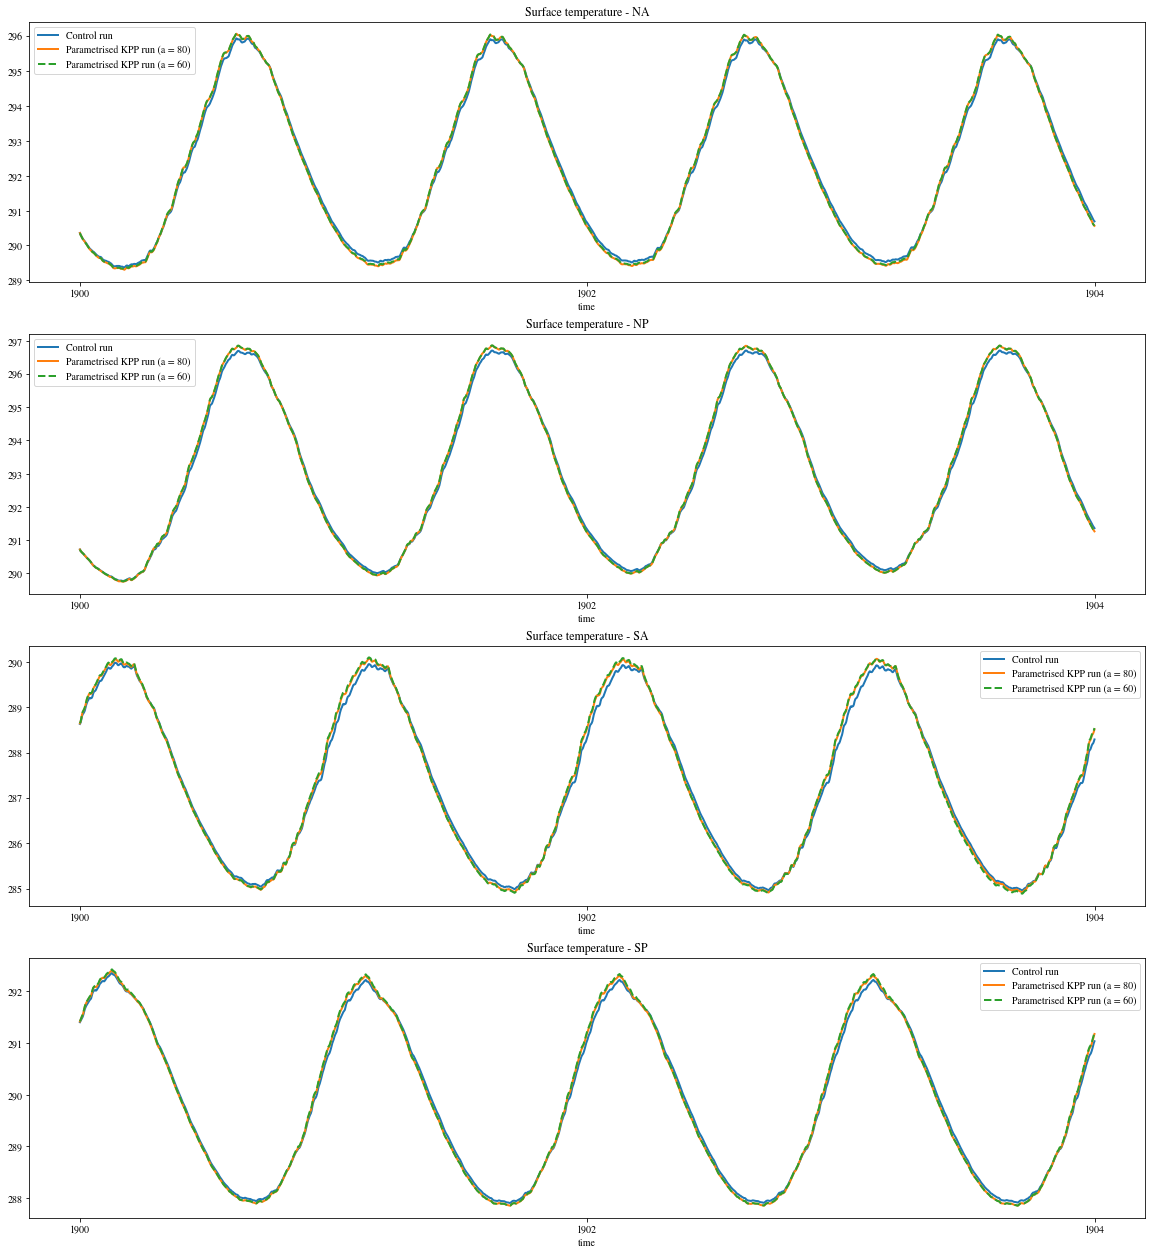

In [13]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

temp_cont_NA.plot(ax = axes[0],label = 'Control run')
temp_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
temp_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[0].legend()
axes[0].set_title('Surface temperature - NA')

temp_cont_NP.plot(ax = axes[1],label = 'Control run')
temp_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
temp_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[1].legend()
axes[1].set_title('Surface temperature - NP')

temp_cont_SA.plot(ax = axes[2],label = 'Control run')
temp_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
temp_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[2].legend()
axes[2].set_title('Surface temperature - SA')

temp_cont_SP.plot(ax = axes[3],label = 'Control run')
temp_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
temp_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[3].legend()
axes[3].set_title('Surface temperature - SP')

## Surface salinity

In [14]:
salt_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 daily')
salt_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_salt', frequency = '1 daily')

In [15]:
salt_cont_NA = (salt_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NA = (salt_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_NA = (salt_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_NP = (salt_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_NP = (salt_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_NP = (salt_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SA = (salt_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SA = (salt_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_SA = (salt_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

salt_cont_SP = (salt_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pram_SP = (salt_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_pra2_SP = (salt_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface salinity - SP')

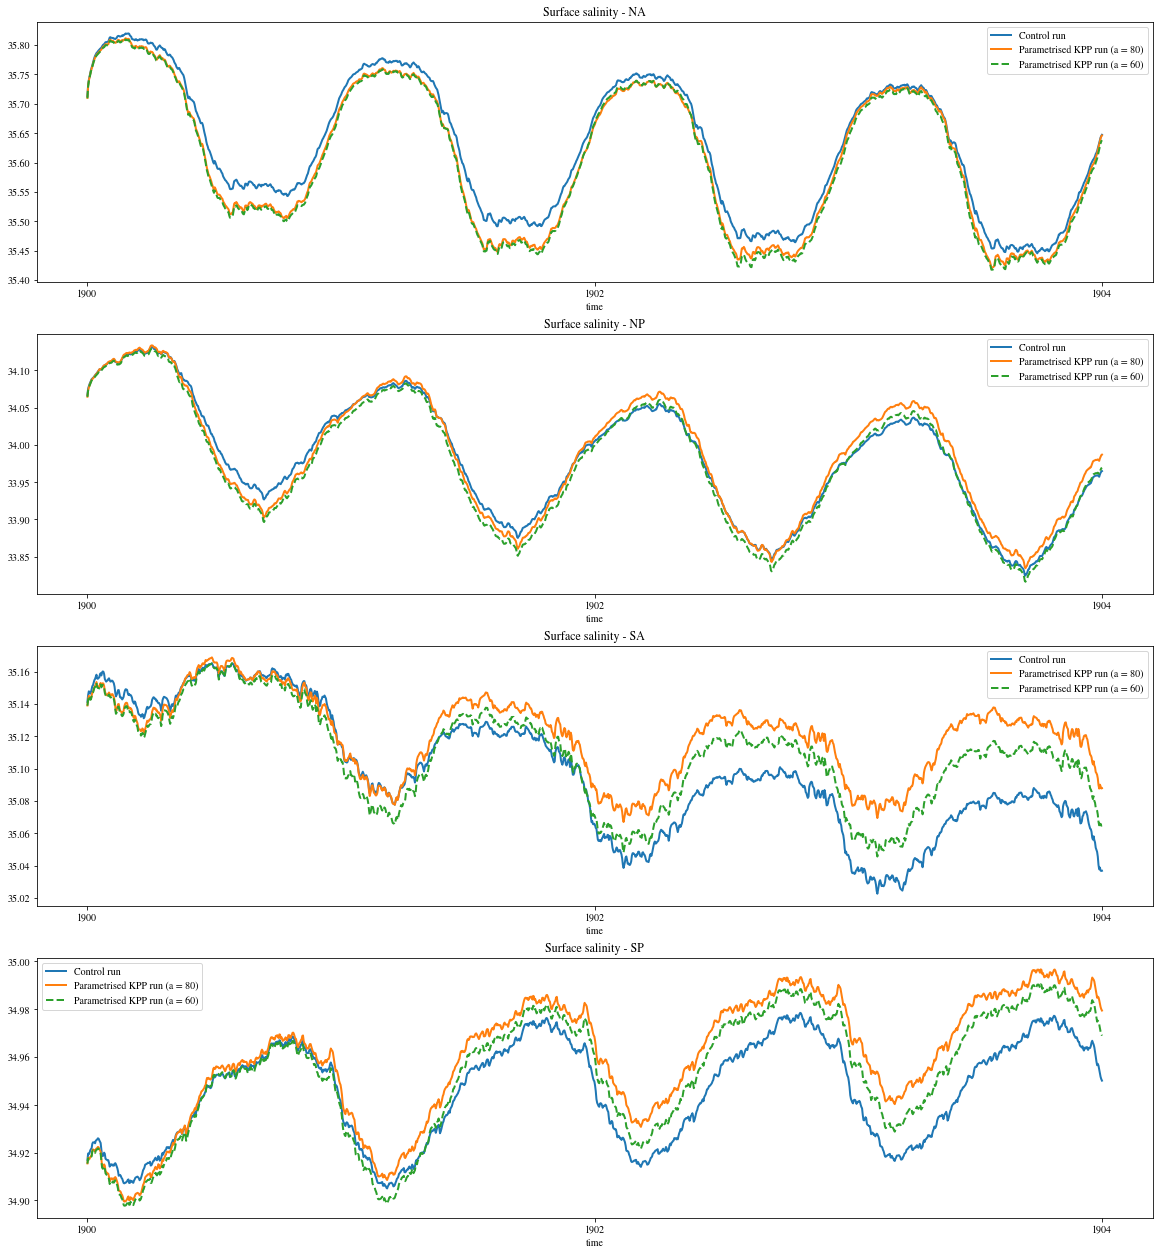

In [16]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

salt_cont_NA.plot(ax = axes[0],label = 'Control run')
salt_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
salt_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[0].legend()
axes[0].set_title('Surface salinity - NA')

salt_cont_NP.plot(ax = axes[1],label = 'Control run')
salt_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
salt_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[1].legend()
axes[1].set_title('Surface salinity - NP')

salt_cont_SA.plot(ax = axes[2],label = 'Control run')
salt_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
salt_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[2].legend()
axes[2].set_title('Surface salinity - SA')

salt_cont_SP.plot(ax = axes[3],label = 'Control run')
salt_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
salt_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[3].legend()
axes[3].set_title('Surface salinity - SP')

## Freshwater fluxes

In [17]:
pme_river_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 monthly')
pme_river_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'pme_river', frequency = '1 monthly')

In [18]:
pme_cont_NA = (pme_river_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NA = (pme_river_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_NA = (pme_river_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_NP = (pme_river_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_NP = (pme_river_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_NP = (pme_river_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SA = (pme_river_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SA = (pme_river_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_SA = (pme_river_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

pme_cont_SP = (pme_river_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pram_SP = (pme_river_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_pra2_SP = (pme_river_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Freshwater input - SP')

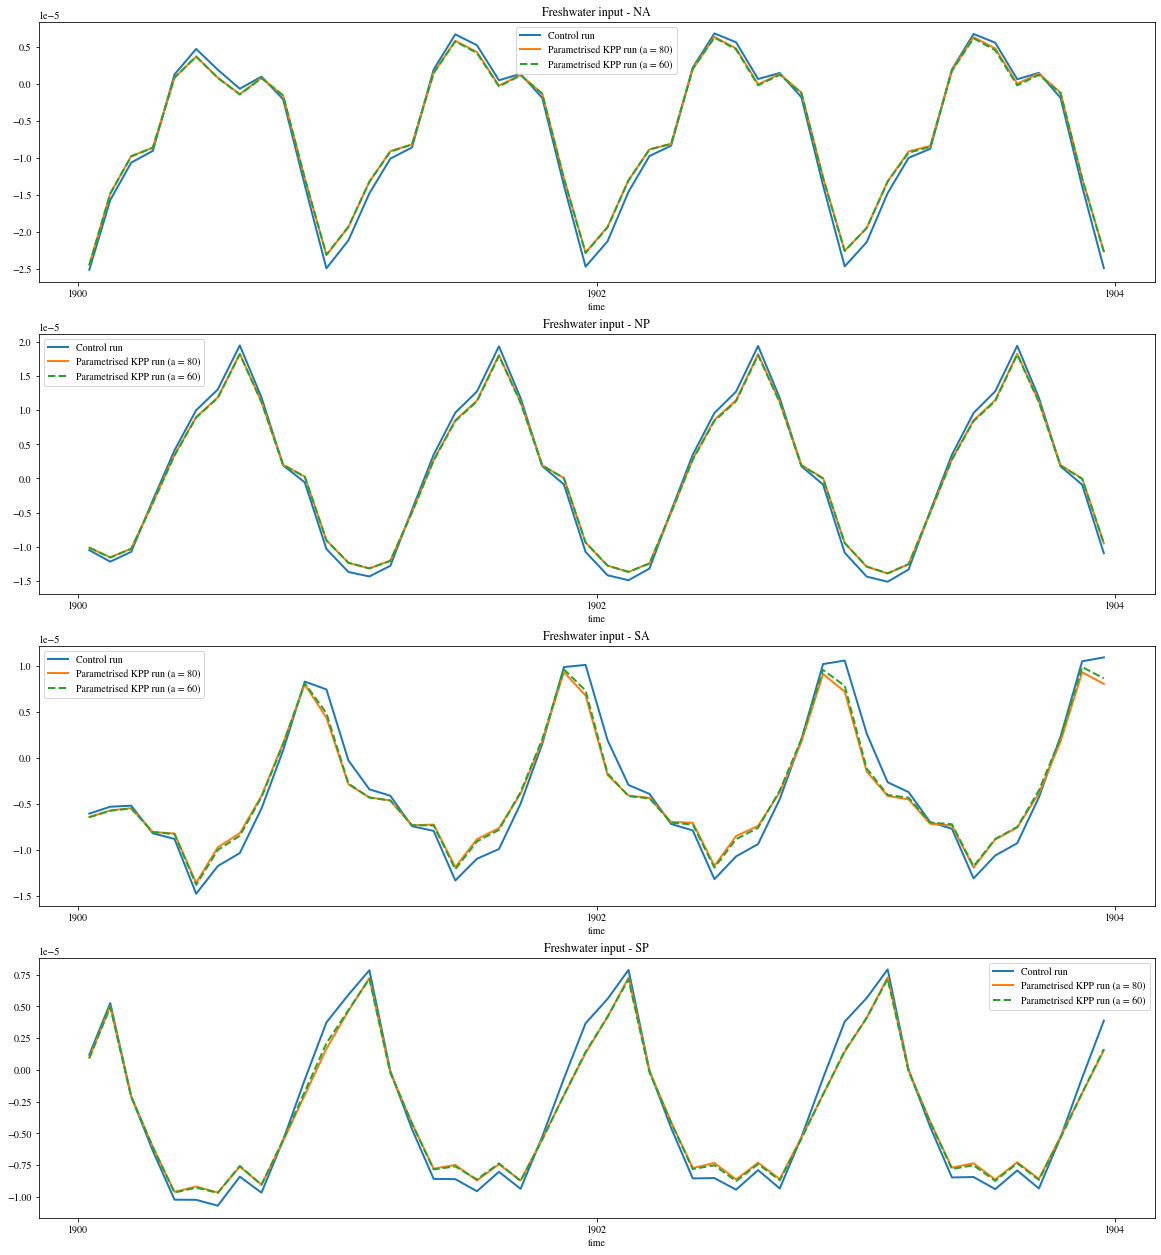

In [19]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

pme_cont_NA.plot(ax = axes[0],label = 'Control run')
pme_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
pme_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[0].legend()
axes[0].set_title('Freshwater input - NA')

pme_cont_NP.plot(ax = axes[1],label = 'Control run')
pme_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
pme_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[1].legend()
axes[1].set_title('Freshwater input - NP')

pme_cont_SA.plot(ax = axes[2],label = 'Control run')
pme_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
pme_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[2].legend()
axes[2].set_title('Freshwater input - SA')

pme_cont_SP.plot(ax = axes[3],label = 'Control run')
pme_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
pme_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[3].legend()
axes[3].set_title('Freshwater input - SP')

## Surface heat flux

In [20]:
heat_sfc_cont = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pram = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')
heat_sfc_pra2 = cc.querying.getvar(expt = expt[2], session = session, variable = 'net_sfc_heating', frequency = '1 monthly')

In [21]:
heat_cont_NA = (heat_sfc_cont*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NA = (heat_sfc_pram*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_NA = (heat_sfc_pra2*area_t_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_NP = (heat_sfc_cont*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_NP = (heat_sfc_pram*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_NP = (heat_sfc_pra2*area_t_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SA = (heat_sfc_cont*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SA = (heat_sfc_pram*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_SA = (heat_sfc_pra2*area_t_SA).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SA.sum(dim = ['yt_ocean','xt_ocean'])

heat_cont_SP = (heat_sfc_cont*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pram_SP = (heat_sfc_pram*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_pra2_SP = (heat_sfc_pra2*area_t_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_SP.sum(dim = ['yt_ocean','xt_ocean'])

Text(0.5, 1.0, 'Surface heat flux - SP')

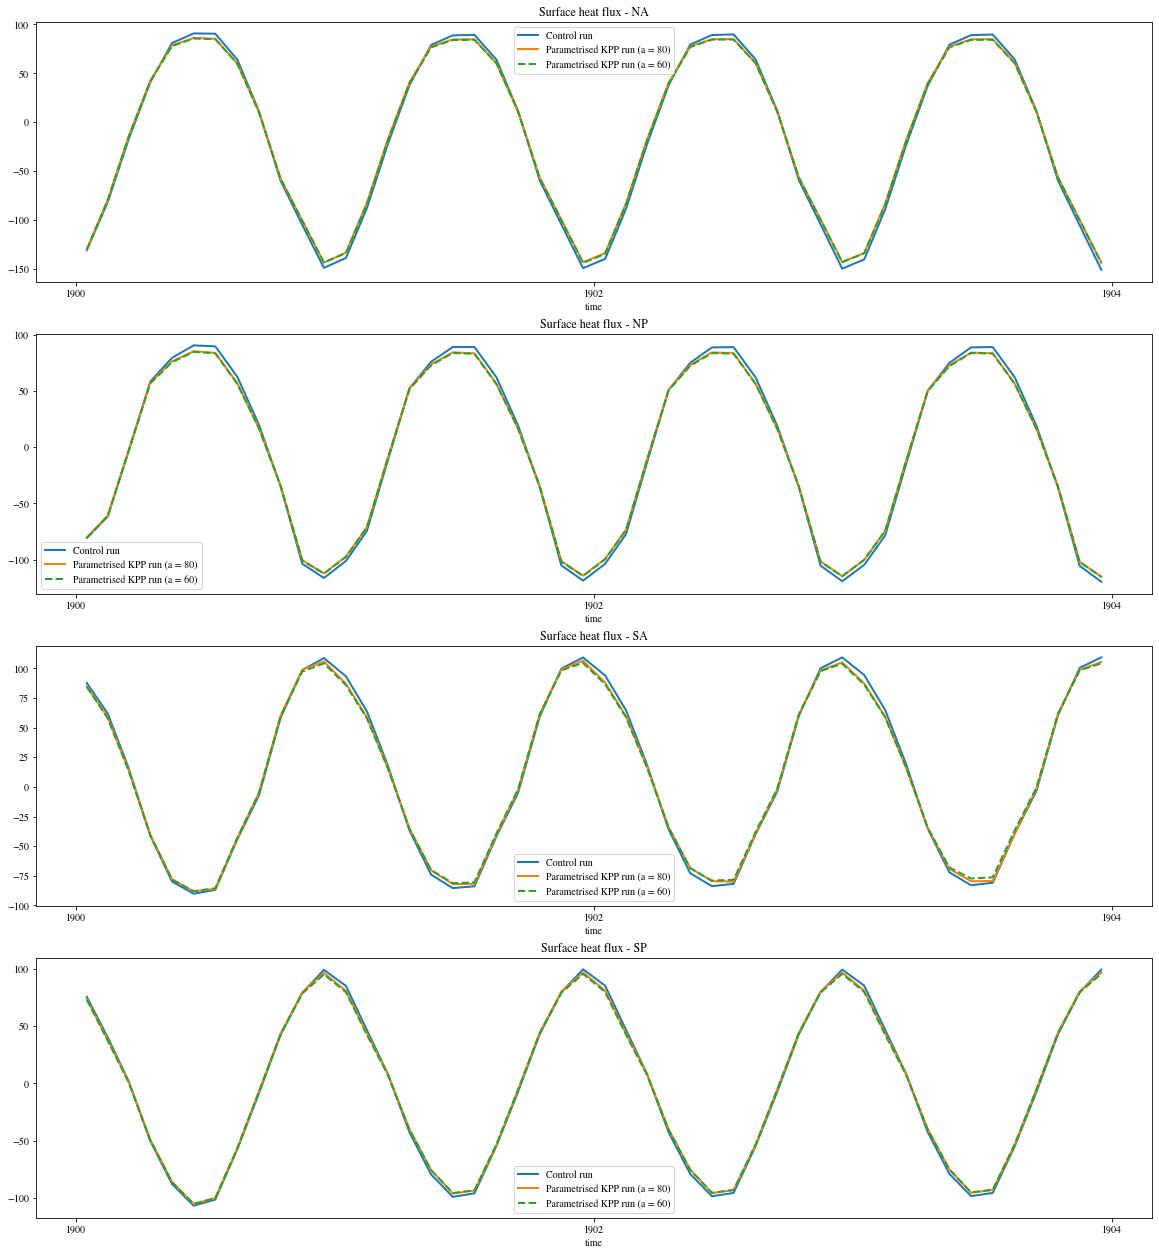

In [22]:
fig, axes = plt.subplots(nrows = 4, figsize = (20,22))

heat_cont_NA.plot(ax = axes[0],label = 'Control run')
heat_pram_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 80)')
heat_pra2_NA.plot(ax = axes[0],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[0].legend()
axes[0].set_title('Surface heat flux - NA')

heat_cont_NP.plot(ax = axes[1],label = 'Control run')
heat_pram_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 80)')
heat_pra2_NP.plot(ax = axes[1],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[1].legend()
axes[1].set_title('Surface heat flux - NP')

heat_cont_SA.plot(ax = axes[2],label = 'Control run')
heat_pram_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 80)')
heat_pra2_SA.plot(ax = axes[2],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[2].legend()
axes[2].set_title('Surface heat flux - SA')

heat_cont_SP.plot(ax = axes[3],label = 'Control run')
heat_pram_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 80)')
heat_pra2_SP.plot(ax = axes[3],label = 'Parametrised KPP run (a = 60)', ls = '--')
axes[3].legend()
axes[3].set_title('Surface heat flux - SP')